In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

# 2 State, 2 Actions

Problem found in book "Artificial Intelligence: A Modern Approach (third edition)" of Russel and Novig

The problem is in section 17.4 page 661

In [10]:
states = ['1', '2']
actions = ['stay', 'go']
observations = ['1', '2']

transitions = np.zeros((len(states),len(actions),len(states)))
for s,_ in enumerate(states):
    for a,_ in enumerate(actions):
        for s_p,_ in enumerate(states):
            transitions[s,a,s_p] = 0.9 if ((a == 0) and (s == s_p)) or ((a == 1) and (s != s_p)) else 0.1

observation_table = np.zeros((len(states),len(actions),len(observations)))
for s_p,_ in enumerate(states):
    for a,_ in enumerate(actions):
        for o,_ in enumerate(observations):
            observation_table[s_p,a,o] = 0.6 if s_p == o else 0.4

immediate_reward_table = np.zeros((len(states),len(actions),len(states),len(observations)))

immediate_reward_table[:,:,0,:] = 0
immediate_reward_table[:,:,1,:] = 1

In [11]:
transitions[:,1,:]

array([[0.1, 0.9],
       [0.9, 0.1]])

In [12]:
model = Model(states,actions,observations,transitions,immediate_reward_table,observation_table)

In [13]:
solver = PBVI_Solver(gamma=1)

In [17]:
belief_set = [Belief(model, np.array([1,0])), Belief(model, np.array([0,1]))]

In [19]:
vf = ValueFunction([AlphaVector(model.expected_rewards_table[:,a], a) for a in model.actions])

In [20]:
vf1 = solver.backup(model, belief_set, vf)

<Figure size 700x500 with 0 Axes>

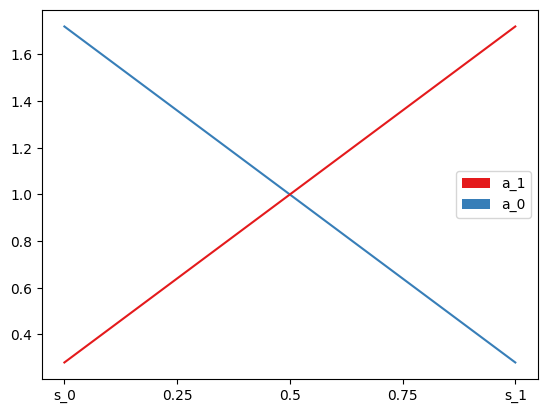

In [22]:
vf1.plot()

In [23]:
from src.mdp import VI_Solver

In [27]:
mdp_solver = VI_Solver(1, gamma=1)

In [28]:
mdp_vf, mdp_history = mdp_solver.solve(model)

<Figure size 700x500 with 0 Axes>

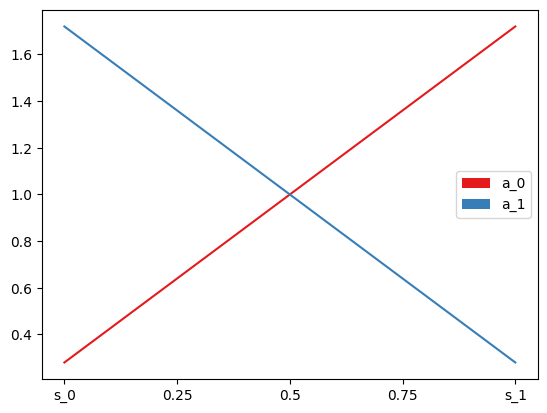

In [29]:
mdp_vf.plot()

In [48]:
rewards = [0,1]

V = ValueFunction([AlphaVector(rewards, -1)])
V_opt = V[0]

old_V_opt = copy.deepcopy(V_opt)

V = []
for a in model.actions:
    alpha_vect = []
    for s in model.states:
        summer = sum(model.transition_table[s, a, s_p] * old_V_opt[s_p] for s_p in model.states)
        alpha_vect.append(rewards[s] + (1 * summer))

    V.append(AlphaVector(alpha_vect, a))

V_opt = np.max(np.array(V), axis=1)

<Figure size 700x500 with 0 Axes>

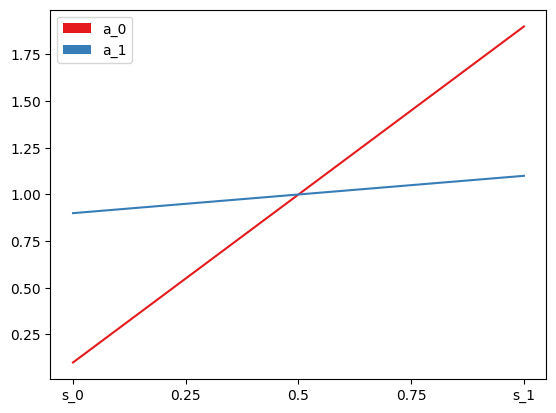

In [49]:
ValueFunction(V).plot()

In [46]:
old_V_opt = copy.deepcopy(V_opt)

V = []
for a in model.actions:
    alpha_vect = []
    for s in model.states:
        summer = sum(model.transition_table[s, a, s_p] * old_V_opt[s_p] for s_p in model.states)
        alpha_vect.append(rewards[s] + (1 * summer))

    V.append(AlphaVector(alpha_vect, a))

V_opt = np.max(np.array(V), axis=1)

<Figure size 700x500 with 0 Axes>

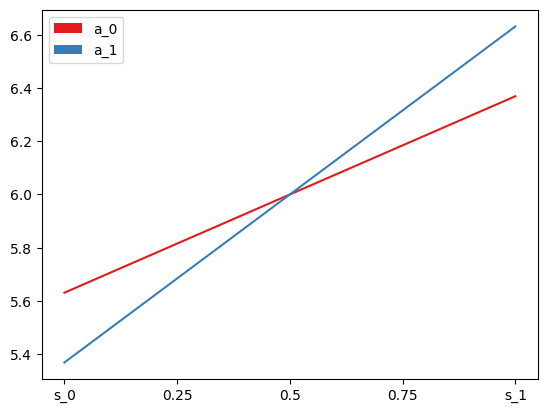

In [47]:
ValueFunction(V).plot()

In [52]:
vf, history = solver.solve(model,expansions=4,horizon=8, initial_belief=belief_set, initial_value_function=ValueFunction(V))

<Figure size 700x500 with 0 Axes>

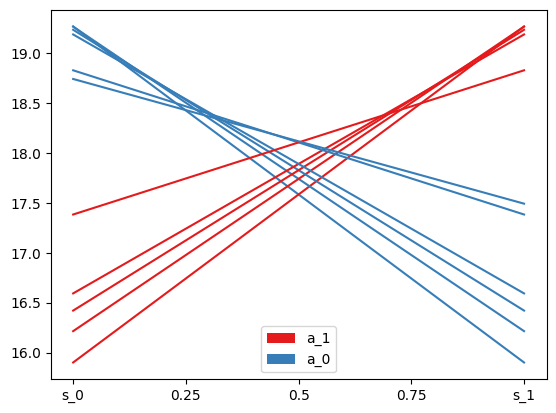

In [53]:
vf.plot()

In [14]:
vf, history = solver.solve(model,expansions=4,horizon=8)

<Figure size 700x500 with 0 Axes>

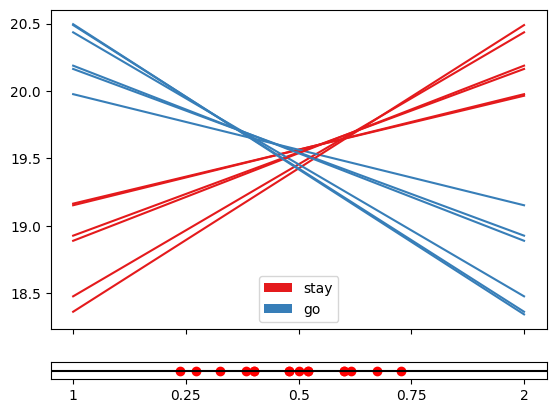

In [16]:
history.plot_solution()

In [57]:
np.arange(12).reshape((3,4))[2,0]

8